In [1]:
import pandas as pd

In [3]:
reports = pd.read_csv('data/reports.csv')

C:\Users\benja\AppData\Local\Temp\ipykernel_73460\174082261.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  reports = pd.read_csv('data/reports.csv')


In [6]:
reports.CURR_INCIDENT_AREA.isna().sum()

16

In [13]:
reports['REPORT_TO_DATE'].fillna(reports['REPORT_FROM_DATE'], inplace=True)
from_date = pd.to_datetime(reports['REPORT_FROM_DATE']).values.astype('int64')
to_date = pd.to_datetime(reports['REPORT_TO_DATE']).values.astype('int64')
reports['mean_report_date'] = pd.to_datetime((from_date + to_date)/2)

Text(0.5, 1.0, 'Evolution of fire areas')

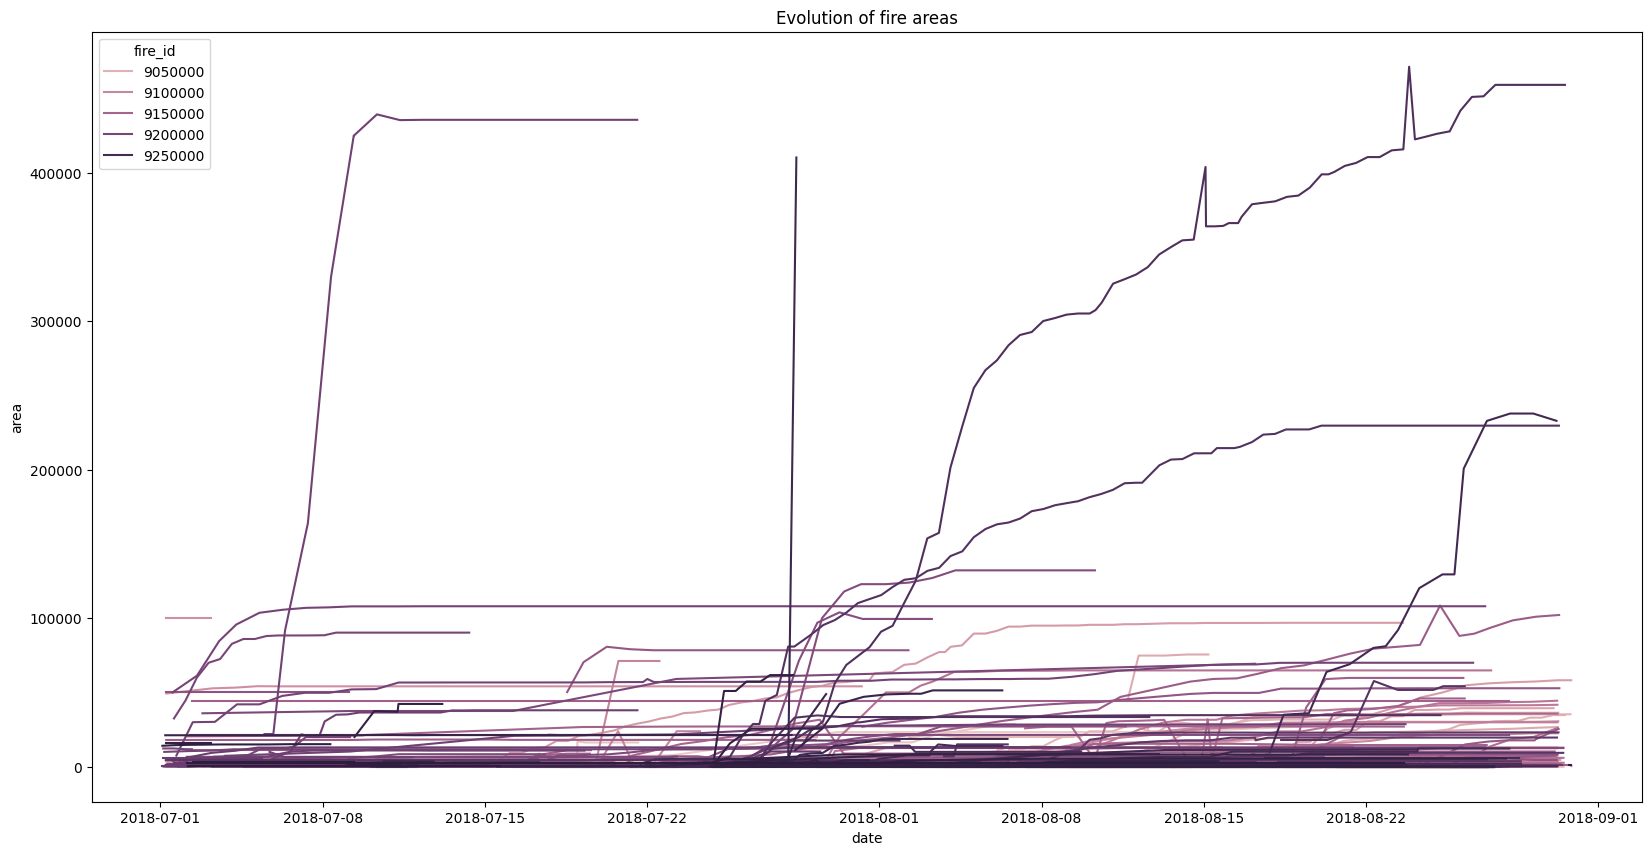

In [80]:
import matplotlib.pyplot as plt
import seaborn as sn
sample_fires = df['fire_id'].unique()
time_window_select = df['date'].between('2018-07-01', '2018-08-31')
plt.figure(figsize=(20,10))
selected_fires = df[time_window_select]
sn.lineplot(data=selected_fires, x='date', y='area', hue='fire_id')
plt.title("Evolution of fire areas")

In [71]:
df = reports[['INC_IDENTIFIER', 'INC209R_IDENTIFIER',  'mean_report_date', 'CURR_INCIDENT_AREA' ]].rename(columns={'INC_IDENTIFIER': 'fire_id', 'INC209R_IDENTIFIER': 'report_id', 'mean_report_date': 'date', 'CURR_INCIDENT_AREA': 'area'})

In [102]:
df

,fire_id,report_id,date,area,prev_area,next_area,prev_area_diff,next_area_diff,prev_date,next_date,prev_date_diff,next_date_diff,prev_derivate,next_derivate
2,2714022,2714023,2015-05-06 10:15:00,150.0,NaN,275.0,NaN,125.0,NaT,2015-05-08 00:30:00,NaN,1.593750,NaN,78.431373
1,2714022,2714037,2015-05-08 00:30:00,275.0,150.0,275.0,125.0,0.0,2015-05-06 10:15:00,2015-05-09 00:30:00,1.593750,1.000000,78.431373,0.000000
3,2714022,2714050,2015-05-09 00:30:00,275.0,275.0,275.0,0.0,0.0,2015-05-08 00:30:00,2015-05-10 13:00:00,1.000000,1.520833,0.000000,0.000000
4,2714022,2714066,2015-05-10 13:00:00,275.0,275.0,NaN,0.0,NaN,2015-05-09 00:30:00,NaT,1.520833,NaN,0.000000,NaN
6,2714081,2714082,2015-05-07 07:15:00,205.0,NaN,205.0,NaN,0.0,NaT,2015-05-08 04:07:30,NaN,0.869792,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44315,9276448,9276458,2018-06-12 09:37:30,484.0,NaN,3341.0,NaN,2857.0,NaT,2018-06-18 09:45:00,NaN,6.005208,NaN,475.753686
44314,9276448,9276449,2018-06-18 09:45:00,3341.0,484.0,3411.0,2857.0,70.0,2018-06-12 09:37:30,2018-06-25 10:15:00,6.005208,7.020833,475.753686,9.970326
44317,9276448,9276476,2018-06-25 10:15:00,3411.0,3341.0,3410.0,70.0,-1.0,2018-06-18 09:45:00,2018-07-02 09:37:30,7.020833,6.973958,9.970326,-0.143391
44318,9276448,9276489,2018-07-02 09:37:30,3410.0,3411.0,3410.0,-1.0,0.0,2018-06-25 10:15:00,2018-07-09 08:30:00,6.973958,6.953125,-0.143391,0.000000


In [101]:
df.groupby('fire_id')['area'].shift(1) == df.groupby('fire_id').shift(1)['area']

2        False
1         True
3         True
4         True
6        False
         ...  
44315    False
44314     True
44317     True
44318     True
44316     True
Name: area, Length: 45389, dtype: bool

In [105]:
df_copy = df.copy()
df_copy['prev_area'] = df_copy.groupby('fire_id').shift(1)['area']
df_copy['next_area'] = df_copy.groupby('fire_id').shift(-1)['area']
df_copy['prev_date'] = df_copy.groupby('fire_id').shift(1)['date']
df_copy['next_date'] = df_copy.groupby('fire_id').shift(-1)['date']
df_copy['prev_date_diff'] = (df_copy['date'] - df_copy['prev_date']).dt.total_seconds()/(24*3600)
df_copy['next_date_diff'] = (df_copy['next_date'] - df_copy['date']).dt.total_seconds()/(24*3600)
df_copy['prev_area_diff'] = df_copy['area'] - df_copy['prev_area']
df_copy['next_area_diff'] = df_copy['next_area'] - df_copy['area']
df_copy['prev_derivate'] = df_copy['prev_area_diff'] / df_copy['prev_date_diff']
df_copy['next_derivate'] = df_copy['next_area_diff'] / df_copy['next_date_diff']

In [116]:
df.iloc[0] 
df_copy.iloc[0]

fire_id                       2714022
report_id                     2714023
date              2015-05-06 10:15:00
area                            150.0
prev_area                         NaN
next_area                       275.0
prev_area_diff                    NaN
next_area_diff                  125.0
prev_date                         NaT
next_date         2015-05-08 00:30:00
prev_date_diff                    NaN
next_date_diff                1.59375
prev_derivate                     NaN
next_derivate               78.431373
Name: 2, dtype: object

In [106]:
df_copy

,fire_id,report_id,date,area,prev_area,next_area,prev_area_diff,next_area_diff,prev_date,next_date,prev_date_diff,next_date_diff,prev_derivate,next_derivate
2,2714022,2714023,2015-05-06 10:15:00,150.0,NaN,275.0,NaN,125.0,NaT,2015-05-08 00:30:00,NaN,1.593750,NaN,78.431373
1,2714022,2714037,2015-05-08 00:30:00,275.0,150.0,275.0,125.0,0.0,2015-05-06 10:15:00,2015-05-09 00:30:00,1.593750,1.000000,78.431373,0.000000
3,2714022,2714050,2015-05-09 00:30:00,275.0,275.0,275.0,0.0,0.0,2015-05-08 00:30:00,2015-05-10 13:00:00,1.000000,1.520833,0.000000,0.000000
4,2714022,2714066,2015-05-10 13:00:00,275.0,275.0,NaN,0.0,NaN,2015-05-09 00:30:00,NaT,1.520833,NaN,0.000000,NaN
6,2714081,2714082,2015-05-07 07:15:00,205.0,NaN,205.0,NaN,0.0,NaT,2015-05-08 04:07:30,NaN,0.869792,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44315,9276448,9276458,2018-06-12 09:37:30,484.0,NaN,3341.0,NaN,2857.0,NaT,2018-06-18 09:45:00,NaN,6.005208,NaN,475.753686
44314,9276448,9276449,2018-06-18 09:45:00,3341.0,484.0,3411.0,2857.0,70.0,2018-06-12 09:37:30,2018-06-25 10:15:00,6.005208,7.020833,475.753686,9.970326
44317,9276448,9276476,2018-06-25 10:15:00,3411.0,3341.0,3410.0,70.0,-1.0,2018-06-18 09:45:00,2018-07-02 09:37:30,7.020833,6.973958,9.970326,-0.143391
44318,9276448,9276489,2018-07-02 09:37:30,3410.0,3411.0,3410.0,-1.0,0.0,2018-06-25 10:15:00,2018-07-09 08:30:00,6.973958,6.953125,-0.143391,0.000000


In [103]:
df.sort_values(by=['fire_id', 'date'], inplace=True)
df['prev_area'] = df.groupby('fire_id')['area'].shift(1)
df['next_area'] = df.groupby('fire_id')['area'].shift(-1)
df['prev_date'] = df.groupby('fire_id')['date'].shift(1)
df['next_date'] = df.groupby('fire_id')['date'].shift(-1)
df['prev_date_diff'] = (df['date'] - df['prev_date']).dt.total_seconds()/(24*3600)
df['next_date_diff'] = (df['next_date'] - df['date']).dt.total_seconds()/(24*3600)
df['prev_area_diff'] = df['area'] - df['prev_area']
df['next_area_diff'] = df['next_area'] - df['area']
df['prev_derivate'] = df['prev_area_diff'] / df['prev_date_diff']
df['next_derivate'] = df['next_area_diff'] / df['next_date_diff']

<Axes: >

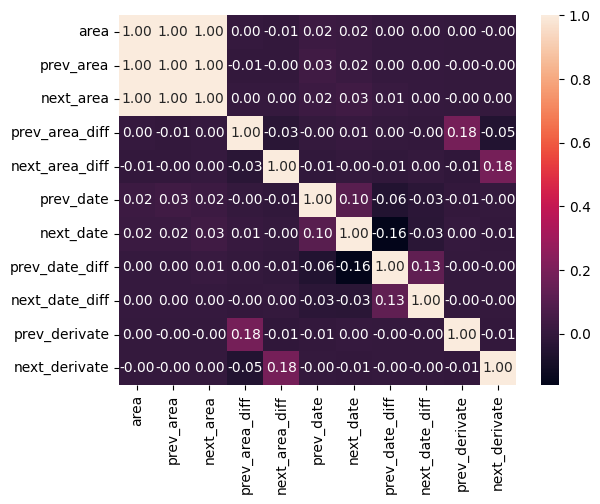

In [104]:
sn.heatmap(df.iloc[:,3:].corr(), annot=True, fmt='.2f')

In [ ]:
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.model_selection import train_test_split
def split_train_test(
    task_df, test_size, group_id, random_state=42, save_datasets=False
):
    """Split data into train and test sets using groups (group_id)

    Arguments:
        task_df {DataFrame} --
        group_id {str} -- group identifier
        random_state {int} -- random state
        target {str} -- target feature
        save_datasets {bool} -- whether to save train and test sets (useful for later evals, tests)

    Returns:
        DataFrame -- train set
        DataFrame -- test set
    """
    assert group_id in task_df.columns, f"Group id {group_id} not in dataframe"
    assert (
        test_size > 0 and test_size < 1
    ), f"Test size {test_size} must be between 0 and 1"

    df = task_df.sample(frac=1, random_state=random_state)
    unique_ids = df[group_id].unique()
    train_ids, test_ids = train_test_split(
        unique_ids, test_size=test_size, random_state=random_state
    )
    train_df = df[df[group_id].isin(train_ids)]
    test_df = df[df[group_id].isin(test_ids)]
    if save_datasets:
        train_df.to_csv("data/preprocessed/train.csv", index=False)
        test_df.to_csv("data/preprocessed/test.csv", index=False)
    return train_df, test_df

train_df, test_df = split_train_test(df, 0.2, 'fire_id', random_state=42, save_datasets=False)

In [98]:
train_df

,fire_id,report_id,date,area,prev_area,next_area,prev_area_diff,next_area_diff,prev_date,next_date,prev_date_diff,next_date_diff,prev_derivate,next_derivate
38923,9144638,9145206,2018-09-29 06:45:00,54334.0,54334.0,54334.0,0.0,0.0,2018-09-28 07:00:00,2018-09-30 19:37:30,0.989583,1.536458,0.000000,0.000000
41248,9178169,9178196,2018-07-16 13:45:00,3386.0,3427.0,3386.0,-41.0,0.0,2018-07-15 14:15:00,2018-07-17 14:45:00,0.979167,1.041667,-41.872340,0.000000
20957,4443443,4443746,2016-09-10 06:00:00,14913.0,14831.0,14913.0,82.0,0.0,2016-09-09 07:00:00,2016-09-11 06:00:00,0.958333,1.000000,85.565217,0.000000
35234,9021553,9021574,2018-05-03 23:22:30,350.0,NaN,300.0,NaN,-50.0,NaT,2018-05-05 20:00:00,NaN,1.859375,NaN,-26.890756
1300,2726766,2726901,2015-06-19 14:32:30,600.0,500.0,500.0,100.0,-100.0,2015-06-19 14:00:00,2015-06-20 02:00:00,0.022569,0.477431,4430.769231,-209.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,2844434,2844806,2015-08-03 10:00:00,37597.3,41514.1,37597.3,-3916.8,0.0,2015-07-29 11:00:00,2015-08-03 10:07:30,4.958333,0.005208,-789.942857,0.000000
11384,4248001,4248002,2016-07-28 13:00:00,176.0,176.0,176.0,0.0,0.0,2016-07-21 13:00:00,2016-08-04 13:00:00,7.000000,7.000000,0.000000,0.000000
45008,9258165,9258398,2018-03-20 05:45:00,281893.0,281893.0,281893.0,0.0,0.0,2018-02-11 20:00:00,2018-05-25 11:45:00,36.406250,66.250000,0.000000,0.000000
472,2725793,2725820,2015-07-10 21:00:00,6500.0,6500.0,NaN,0.0,NaN,2015-06-29 16:52:30,NaT,11.171875,NaN,0.000000,NaN


In [ ]:
plt.figure(figsize=(12, 6))

colors = ["green" if c > 0 else "red" for c in estimator.coef_]
bars = plt.barh(X_test.columns, estimator.coef_, color=colors)

# Annotate the bars with their values
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width > 0 else width - 0.1
    plt.text(
        label_x_pos,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}",
        va="center",
        ha="right" if width < 0 else "left",
    )

plt.title(r"Feature importance ($\beta$ coefficients)")
plt.show()

In [58]:
df['next_diff']= df.groupby('INC_IDENTIFIER').shift(-1)['diff']

C:\Users\benja\AppData\Local\Temp\ipykernel_73460\3518124272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_diff']= df.groupby('INC_IDENTIFIER').shift(-1)['diff']


In [59]:
df

,INC_IDENTIFIER,CURR_INCIDENT_AREA,prev_inc_area,diff,next_diff
0,2714466,535.5,NaN,NaN,20.0
1,2714022,275.0,NaN,NaN,-125.0
2,2714022,150.0,275.0,-125.0,125.0
3,2714022,275.0,150.0,125.0,0.0
4,2714022,275.0,275.0,0.0,NaN
...,...,...,...,...,...
45384,9241251,389967.0,410482.0,-20515.0,-35057.0
45385,9241251,354910.0,389967.0,-35057.0,-153439.0
45386,9241251,201471.0,354910.0,-153439.0,164566.0
45387,9241251,366037.0,201471.0,164566.0,NaN


<Axes: >

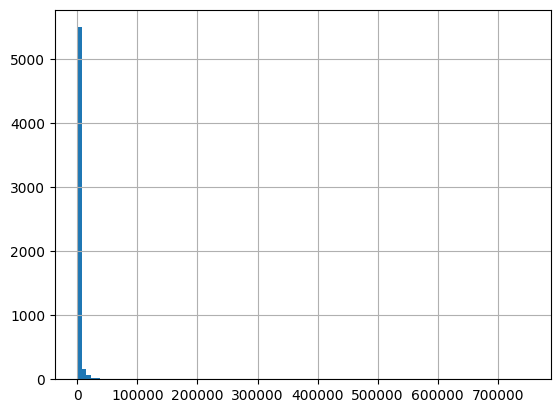

In [11]:
reports.groupby('INC_IDENTIFIER')['CURR_INCIDENT_AREA']

In [ ]:
reports['']

In [ ]:
reports.groupby('INC_IDENTIFIER').